In [1]:
import xgboost as xgb
import pandas as pd

In [2]:
df = pd.read_csv('../data/ks2.csv', encoding='utf-8', parse_dates=['deadline','launched'])

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,US,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,US,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,US,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 00:00:00,2015-07-04 08:35:03,failed,US,19500.00


In [5]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
# this is the file you should've gotten from your repo
from utils import extract_dates, get_val_scores
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split

In [6]:
df['deadline'] = pd.to_datetime(df['deadline'])

In [10]:
df['launched'] = pd.to_datetime(df['launched'])

In [12]:
df = extract_dates(df)

In [13]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,goal,...,launched_quarter,launched_week,launched_weekofyear,launched_day,launched_hour,launched_minute,launched_month,launched_year,deadline_history_days,launched_history_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95,...,3,33,33,11,12,12,8,2015,2350,16658
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00,...,3,35,35,2,4,43,9,2017,3104,17411
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US,45000.00,...,1,2,2,12,0,20,1,2013,1395,15716
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US,5000.00,...,1,11,11,17,3,24,3,2012,1079,15416
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,failed,US,19500.00,...,3,27,27,4,8,35,7,2015,2309,16620


In [14]:
mod1 = xgb.XGBClassifier()

In [15]:
pipe = make_pipeline(OrdinalEncoder(), mod1)

In [16]:
X = df.drop(['deadline','launched', 'state'], axis=1)
y = df['state']

In [18]:
scores = get_val_scores(pipe, X, y, return_test_score=True, random_state=1985, stratify=True, use_kfold=False)

C:\Users\chloe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
scores

{'validation_score': 0.726148499316721, 'test_score': 0.7005304287970199}

In [20]:
from sklearn.model_selection import StratifiedKFold

In [21]:
df['duration'] = (df['deadline'] - df['launched']).dt.days

In [23]:
kfold = StratifiedKFold(n_splits=10)
# good to use 10 folds if unsure how many

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1985, test_size=0.2)

In [30]:
k_scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=kfold)

C:\Users\chloe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

K fold scores are collections of validation scores from across entire data set. Listen to 12/16 lecture around 7:53

In [27]:
mod1.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [29]:
scores

{'validation_score': 0.726148499316721, 'test_score': 0.7005304287970199}

In [32]:
k_scores.mean()

0.7042073305059333

In [33]:
k_scores

array([0.70580693, 0.70280393, 0.7069204 , 0.70599946, 0.70549332,
       0.69989202, 0.70505466, 0.70741666, 0.70410987, 0.69857606])

In [34]:
pipe.fit(X,y)

C:\Users\chloe\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'category', 'main_category',
                                      'currency', 'country'],
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': Ice Bunny                                                          1
700 Knights 2 of 4 - Let's Print                                   2
The Lil Trucker™                                                   3
Departure                                                          4
Billion Dollar Beauty Boom, a documentary on China's women         5
                                                               ...  
Mullen's Leather Working and Armory                           294517
Don Camaleon                                                  294518
A Quest to Etch                                               294...
                              

In [36]:
#predictive accuracy, but not the most important metric (watch 12/16 around 8:20)
pipe.score(X,y)

0.7230047455284597

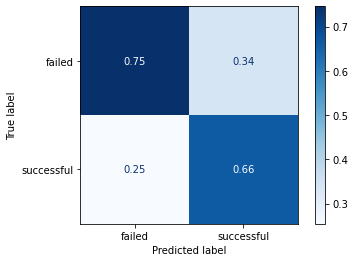

In [41]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Blues, normalize='pred');

Chart above shows how well it predicts positive AND negative cases. Model did slightly better job of predicted fails (75%) vs successes (66%).

In [42]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

      failed       0.75      0.86      0.80     47224
  successful       0.66      0.48      0.56     26867

    accuracy                           0.72     74091
   macro avg       0.71      0.67      0.68     74091
weighted avg       0.72      0.72      0.71     74091



In [45]:
# converts correct answers to 1 and incorrect, to 0
from sklearn.metrics import f1_score
y_true = np.where(y_test == 'successful', 1, 0)
y_pred = np.where(pipe.predict(X_test) == 'successful', 1, 0)
# our f1 score
f1_score(y_true, y_pred)

0.5601998406443137

In [44]:
y_true

array([0, 0, 0, ..., 1, 0, 0])

Watch last few minutes to see explanation of imbalanced weighting